# Veri Ön İşleme ( Data Preprocessing )

Eksik, Yanlış ve Marjinal Verilerle Çalışma

Neden veri temizliği önemlidir?
* Makine öğreinim modellerinin doğru ve güvenilir sonuçlar vermesi için kritik.
* Yanlışi veya eksilk veeriler hatalı tahminlere ve yanlış kararlara yol açalbilir
* Kaliteli veri daha güçlü ve genellebilir modeller oluşturmamızı sağlar
* Matemaitksel alt yapı istatiksel yönntemlerin ortalam standart sapma vb. doğru hesaplanması için veirleri temiz olması gerekir.

Veri kalitesi sorunları
* Eksik veri bazı gözmlwmder bazı özellklerin değerlenin olmaması
* yanlış veri yanluş girilmiş tutarsız veya geçerli olmayan veirleri
* aykırı marjinal verile r diğer gözlemrden çok farlı olan uç noktalar
* tutarsızlıklar aynı biligiyi farklı formatlada veya farklı şekillerde temsil eden değerler

Veri temizleme süreci
1. Veri tespiti hataları ve eksikleri belirlemek
2. veri düzenlemtme hataları düzeltmek veya eksikleri gidermek
3. veri döünüşümü veriyi analizi çin ıyugun bir formata getirmek
4. doğrılama temizlenmi şverinin dıpru olduğundan emin olmak

Kullanılan Araçlar ve Kütüphaneler
* Pandas: veri analizi ve işleme için güçlü bir kütüphane
* NumPy: sayısal hesaplamalar için temel kütüphane
* Matplotlib ve Seaborn: veri görselleştirme için kullanılır
* Scikit-learn: makine öğrenimi ve veri ön işleme için geniş bir kütüphane
* Missingno: eksik verileri görselleştirmek ve analiz etmek için kullanılır

Eksik veri tespiti
* bir veri seitnden gözlemlerde belirli sutunlerşn değelerini mamasıdır
* "Nan" not a bumver oalrak gösterilir
* Neden önemli?
  * Eksik veriler modelin performansını etkileyebilir
  * Eksik verilerin nedenleri anlaşılmalıdır
  * Eksik verilerin nasıl ele alınacağına karar verilmelidir


pandas.isnull() ve pandas.isna()

In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np

In [2]:
# Örnek veri seti oluştur
data = {
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 5, 6, 7],
    'C': [8, 9, 10, np.nan]
}

In [4]:
# DataFrame oluştur
df = pd.DataFrame(data)
print(df)

     A    B     C
0  1.0  NaN   8.0
1  2.0  5.0   9.0
2  NaN  6.0  10.0
3  4.0  7.0   NaN


In [9]:
print(df.isnull()) # Eksik verileri kontrol et
print(df.isnull().sum()) # Her sütundaki eksik veri sayısını göster
print(df.isnull().sum().sum()) # Toplam eksik veri sayısını göster

       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False   True
A    1
B    1
C    1
dtype: int64
3


In [10]:
print(df.isna()) # Eksik verileri kontrol et
print(df.isna().sum()) # Her sütundaki eksik veri sayısını göster
print(df.isna().sum().sum()) # Toplam eksik veri sayısını göster

       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False   True
A    1
B    1
C    1
dtype: int64
3


Missingno Kütüphanesi
* Eksik verileri görselleştirmek için kullanılır
* Matrix(), bar(), heatmap() gibi fonksiyonlar ile eksik verileri görselleştirir
* msno.matrix() ile eksik verilerin dağılımını görselleştirir
* msno.bar() ile eksik verilerin sayısını ve oranını gösterir
* msno.heatmap() ile eksik verilerin korelasyonunu gösterir
* msno.dendrogram() ile eksik verilerin hiyerarşik yapısını gösterir

In [11]:
# 📦 Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [12]:
# 📊 Örnek veri: Bazı hücreler eksik (NaN)
data = {
    'A': [1, 2, np.nan, 4, np.nan, 6, 7, 8, np.nan, 10],
    'B': [11, np.nan, 13, 14, 15, np.nan, 17, 18, 19, 20],
    'C': [21, 22, 23, 24, np.nan, 26, 27, np.nan, 29, 30],
    'D': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'E': [np.nan]*5 + [46, 47, 48, 49, 50]
}
df = pd.DataFrame(data)

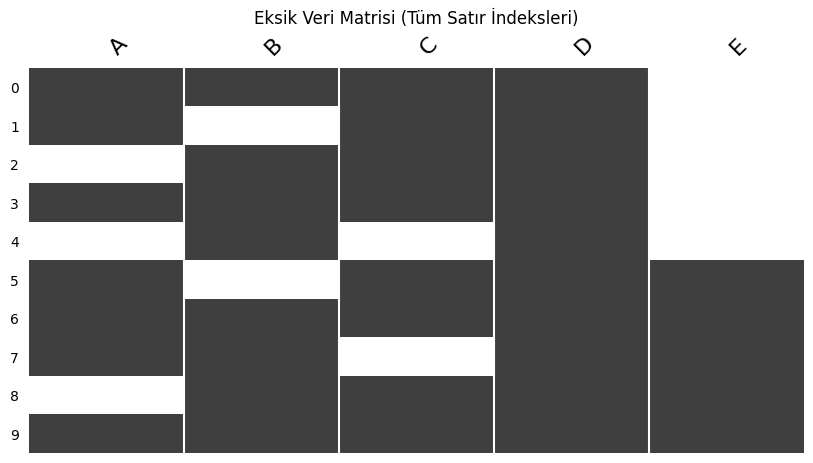

In [13]:
# ----------------------------------------------------
# 1️⃣ Eksik Veri Matrisi (sparkline kapalı, tüm satır indeksleri açık)
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
msno.matrix(df, ax=ax, sparkline=False)  # sparkline kapalı
ax.set_yticks(np.arange(len(df)))         # Satır sayısı kadar yer işareti
ax.set_yticklabels(df.index, fontsize=10) # İndeksleri göster
plt.title("Eksik Veri Matrisi (Tüm Satır İndeksleri)")
plt.show()

# ----------------------------------------------------

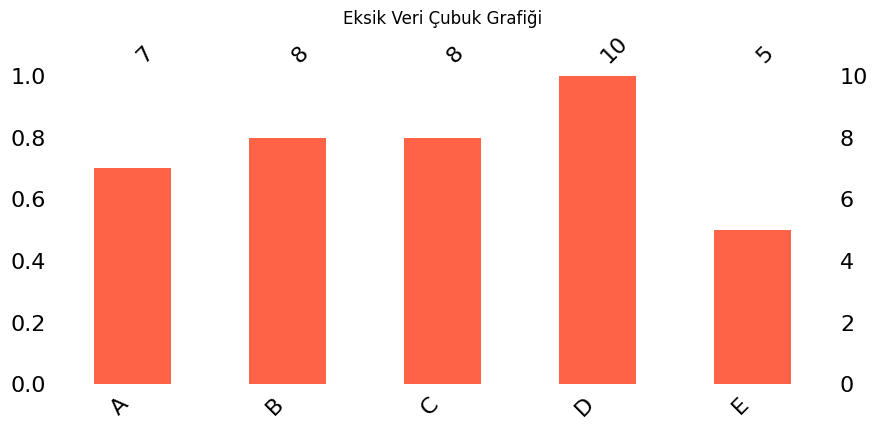

In [14]:
# 2️⃣ Eksik Veri Çubuk Grafiği: Hangi sütunda ne kadar eksik?
msno.bar(df, figsize=(10, 4), color='tomato')
plt.title("Eksik Veri Çubuk Grafiği")
plt.show()

# ----------------------------------------------------

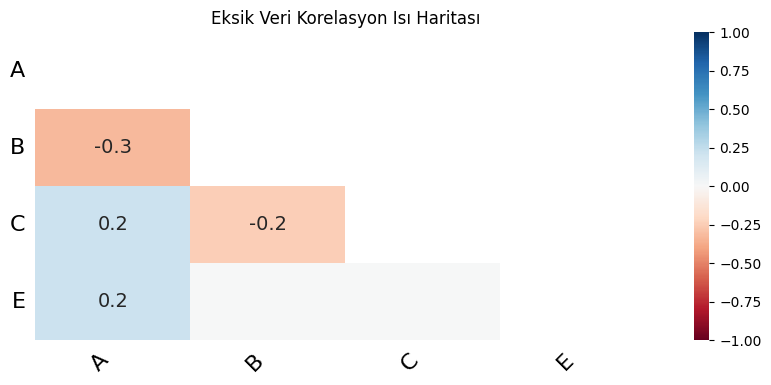

In [15]:
# 3️⃣ Eksik Veri Isı Haritası: Korelasyon ilişkileri (birlikte eksik olma)
msno.heatmap(df, figsize=(10, 4))
plt.title("Eksik Veri Korelasyon Isı Haritası")
plt.show()

# ----------------------------------------------------

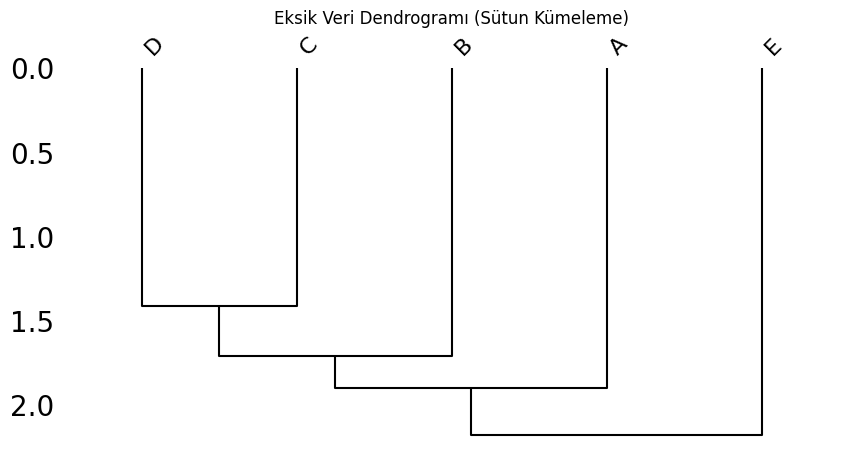

In [16]:
# 4️⃣ Eksik Veri Dendrogramı: Eksiklik örüntüsüne göre sütun gruplama
msno.dendrogram(df, figsize=(10, 5))
plt.title("Eksik Veri Dendrogramı (Sütun Kümeleme)")
plt.show()

## Eksik veri doldurma teknikleri
* Eksik veri veri analizini ve modellemeyi olumsuz etkileyebilir
* doldurma veri kaybını en aza inderek analiz doğruluğunu artılabilir
* bazı makine öğrenimi algoritmaları eksik velriere işleyemez bu yüzden doldurma gereklidir


Eksik veri dıkdurma teknileri - Ortalama, medyan mod ile doldurma
* Ortalama: sayıssal sütunlardaki eksik değerleri sütunun ortalamasoyla doldurma.
  * df['column_name'].fillna(df['column_name'].mean(), inplace=True)
  * df['sutun'].fillna(df['sutun'].mean(), inplace=True)
  * avantajı basit ve hızlı
  * dezavantajı aykırı değerlendern etkilernir vayansı azaltır

* Medyan: sayıssal sütunlardaki eksik değerleri sütunun medyanı ile doldurma.
  * df['column_name'].fillna(df['column_name'].median(), inplace=True)
  * df['sutun'].fillna(df['sutun'].median(), inplace=True)
  * avantajı aykırı değerlere karşı daha dayanıklıdır
  * dezavantajı varyansı azaltır

* Mod: kategorik sütunlardaki eksik değerleri sütunun moduyla doldurma.
  * df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)
  * df['sutun'].fillna(df['sutun'].mode()[0], inplace=True)
  * avantajı kategorik veriler için uygundur
  * dezavantajı en sık değeri baskın hale getirebilir

In [17]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np

In [36]:
# Örnek veri seti oluştur
data = {
    'A': [1, 2, np.nan, 4,5],
    'B': [np.nan, 5, 6, 7, 8],
    'C': [8, 'a', 'a', np.nan, 12],
    'D': ['a', 'b', np.nan, 'a', 'e'],
    'E': [np.nan, np.nan, np.nan, np.nan, 8]
}
# Veriyi DataFrame'e dönüştür
df = pd.DataFrame(data)
print("Original DataFrame:", df)

Original DataFrame:      A    B    C    D    E
0  1.0  NaN    8    a  NaN
1  2.0  5.0    a    b  NaN
2  NaN  6.0    a  NaN  NaN
3  4.0  7.0  NaN    a  NaN
4  5.0  8.0   12    e  8.0


In [37]:
# Ortalama ile doldurma
df['A_avg'] = df['A'].fillna(df['A'].mean()) # A sütununu ortalama ile doldur
print("Ortalama ile doldurulmuş Dataframe:\n", df)

Ortalama ile doldurulmuş Dataframe:
      A    B    C    D    E  A_avg
0  1.0  NaN    8    a  NaN    1.0
1  2.0  5.0    a    b  NaN    2.0
2  NaN  6.0    a  NaN  NaN    3.0
3  4.0  7.0  NaN    a  NaN    4.0
4  5.0  8.0   12    e  8.0    5.0


In [38]:
# Medyan ile doldurma
df['B_med'] = df['B'].fillna(df['B'].median()) # B sütununu medyan ile doldur
print("Medyan ile doldurulmuş Dataframe:\n", df)

Medyan ile doldurulmuş Dataframe:
      A    B    C    D    E  A_avg  B_med
0  1.0  NaN    8    a  NaN    1.0    6.5
1  2.0  5.0    a    b  NaN    2.0    5.0
2  NaN  6.0    a  NaN  NaN    3.0    6.0
3  4.0  7.0  NaN    a  NaN    4.0    7.0
4  5.0  8.0   12    e  8.0    5.0    8.0


In [39]:
# Mod ile doldurma
df['C_mod'] = df['C'].fillna(df['D'].mode()[0]) # C sütununu mod ile doldur
print("Mod ile doldurulmuş Dataframe:\n", df)

Mod ile doldurulmuş Dataframe:
      A    B    C    D    E  A_avg  B_med C_mod
0  1.0  NaN    8    a  NaN    1.0    6.5     8
1  2.0  5.0    a    b  NaN    2.0    5.0     a
2  NaN  6.0    a  NaN  NaN    3.0    6.0     a
3  4.0  7.0  NaN    a  NaN    4.0    7.0     a
4  5.0  8.0   12    e  8.0    5.0    8.0    12


Eksik veri doldurma teknikleri - ileri ve geri doldurma
İleri doldurma: eksik değerleri kendinden öncekigeçerli verilerle doldurma
  * df['column_name'].fillna(method='ffill', inplace=True)
  * df['sutun'].fillna(method='ffill', inplace=True)
  * avantajı zaman serisi verilerinde kullanışlıdır
  * dezavantajı yanlış tahminlere yol açabilir ani değişiklikleri yakalyamaz.

Geri doldurma: eksik değerleri kendinden sonraki geçerli değerle doldurma
  * df['column_name'].fillna(method='bfill', inplace=True)
  * df['sutun'].fillna(method='bfill', inplace=True)
  * avantajı zaman serisi verilerinde kullanışlıdır
  * dezavantajı yanlış tahminlere yol açabilir Ani değişiklikleri yakalaymaz.
.


In [48]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np

In [49]:
# Örnek Dataframe ( Zaman serisi gibi sıralı veri )
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 5, 6, 7, 8],
    'C': [8, np.nan, np.nan, 11, 12]
}
# Veriyi DataFrame'e dönüştür
df = pd.DataFrame(data)

In [53]:
# İleri doldurma ( forward fill )
df['A_ffill'] = df['A'].fillna(method='ffill') # A sütununu ileri doldur
print("İleri doldurulmuş Dataframe:\n", df)

İleri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill
0  1.0  NaN   8.0      1.0      5.0
1  2.0  5.0   NaN      2.0      5.0
2  NaN  6.0   NaN      2.0      6.0
3  4.0  7.0  11.0      4.0      7.0
4  5.0  8.0  12.0      5.0      8.0


/tmp/ipykernel_3984/743894941.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['A_ffill'] = df['A'].fillna(method='ffill') # A sütununu ileri doldur


In [54]:
# İleri doldurma ( forward fill ) ( optional )
df['A_ffill'] = df['A'].ffill() # A sütununu ileri doldur
print("İleri doldurulmuş Dataframe:\n", df)


İleri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill
0  1.0  NaN   8.0      1.0      5.0
1  2.0  5.0   NaN      2.0      5.0
2  NaN  6.0   NaN      2.0      6.0
3  4.0  7.0  11.0      4.0      7.0
4  5.0  8.0  12.0      5.0      8.0


In [51]:
# Geri doldurma ( backward fill )
df['B_bfill'] = df['B'].fillna(method='bfill') # B sütununu geri doldur
print("Geri doldurulmuş Dataframe:\n", df)

Geri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill
0  1.0  NaN   8.0      1.0      5.0
1  2.0  5.0   NaN      2.0      5.0
2  NaN  6.0   NaN      2.0      6.0
3  4.0  7.0  11.0      4.0      7.0
4  5.0  8.0  12.0      5.0      8.0


/tmp/ipykernel_3984/1832613244.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['B_bfill'] = df['B'].fillna(method='bfill') # B sütununu geri doldur


In [56]:
# Geri doldurma ( backward fill ) (optional)
df['B_bfill'] = df['B'].bfill()
print("Geri doldurulmuş Dataframe:\n", df)

Geri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill
0  1.0  NaN   8.0      1.0      5.0
1  2.0  5.0   NaN      2.0      5.0
2  NaN  6.0   NaN      2.0      6.0
3  4.0  7.0  11.0      4.0      7.0
4  5.0  8.0  12.0      5.0      8.0


In [57]:
# Önceki ve sonraki geçerli değerlerle doldurma
df['C_both'] = df['C'].fillna(method='bfill').fillna(method='ffill') # C sütununu hem ileri hem geri doldur
print("Geri doldurulmuş Dataframe:\n", df)

Geri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill  C_both
0  1.0  NaN   8.0      1.0      5.0     8.0
1  2.0  5.0   NaN      2.0      5.0    11.0
2  NaN  6.0   NaN      2.0      6.0    11.0
3  4.0  7.0  11.0      4.0      7.0    11.0
4  5.0  8.0  12.0      5.0      8.0    12.0


/tmp/ipykernel_3984/2870219776.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['C_both'] = df['C'].fillna(method='bfill').fillna(method='ffill') # C sütununu hem ileri hem geri doldur


In [58]:
# Önceki ve sonraki geçerli değerlerle doldurma ( Optional )
df['C_both'] = df['C'].bfill().ffill() # C sütununu hem ileri hem geri doldur
print("Geri doldurulmuş Dataframe:\n", df)

Geri doldurulmuş Dataframe:
      A    B     C  A_ffill  B_bfill  C_both
0  1.0  NaN   8.0      1.0      5.0     8.0
1  2.0  5.0   NaN      2.0      5.0    11.0
2  NaN  6.0   NaN      2.0      6.0    11.0
3  4.0  7.0  11.0      4.0      7.0    11.0
4  5.0  8.0  12.0      5.0      8.0    12.0


Eksik veri doldurma teknikleri - Tahmine Dayalı Doldurma
* Eksik değerleri diğer özelliklere dayanarak tahmin etme
  * Regresyon
    * sayısal eksiklikler için
    * örneğin linear regresyon kullanarak eksik değerleri tahmin edebiliriz
  * K-En Yakın komşular (KNN)
    * sayısal ve kategorik eksikler için
    * KNNImputer sınıfı kullanarak eksik değerleri tahmin edebiliriz ( Scikit-learn kütüphanesi)
* Avantajı: Daha doğru sonuçlar verir
* Dezavantajı: Hesaplama maliyeti yüksektir, Modelleme hatalarına duyarlı

En Yakın Komşu (KNN) - KNNImputer

In [62]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [63]:
# Örnek Dataframe ( KNNImputer )
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 5, 6, 7, 8],
    'C': [8, np.nan, np.nan, 11, 12]
}
df = pd.DataFrame(data)
print("Orijinal Dataframe:\n", df)

Orijinal Dataframe:
      A    B     C
0  1.0  NaN   8.0
1  2.0  5.0   NaN
2  NaN  6.0   NaN
3  4.0  7.0  11.0
4  5.0  8.0  12.0


In [65]:
# KNNImputer objesi oluştur
knn_imputer = KNNImputer(n_neighbors=3) # 3 komşu kullan ( Eşitliği bozmak için genelde tek sayı tercih edilir. )
# KNNImputer objesini fit et ve veriyi dönüştür
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df),columns=df.columns)
print("KNNImputer ile doldurulmuş Dataframe:\n", df_imputed)

KNNImputer ile doldurulmuş Dataframe:
           A         B          C
0  1.000000  6.666667   8.000000
1  2.000000  5.000000  10.333333
2  3.666667  6.000000  11.500000
3  4.000000  7.000000  11.000000
4  5.000000  8.000000  12.000000


Regression

In [66]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [67]:
def otomatik_regresyon_doldurma(df):
    """
    Tüm eksik değerleri, eksik oranı az olandan başlayarak regresyon ile doldurur.
    """
    df = df.copy()
    eksik_oranlar = df.isnull().mean().sort_values()  # Azdan çoğa

    for hedef_sutun in eksik_oranlar.index:
        if df[hedef_sutun].isnull().sum() == 0:
            continue  # Eksik yoksa atla

        print(f"\n🛠️ '{hedef_sutun}' sütunu dolduruluyor...")

        # Bağımlı sütunlar: diğer sütunlardan eksik olmayanlar
        diger_sutunlar = df.columns.drop(hedef_sutun)
        doldurulabilir_sutunlar = [s for s in diger_sutunlar if df[s].isnull().sum() == 0]

        if not doldurulabilir_sutunlar:
            print(f"⚠️ '{hedef_sutun}' için uygun bağımsız değişken yok. Atlanıyor.")
            continue

        # Eğitim verisi (hedef ve bağımsızlarda eksik olmayan)
        egitim_df = df[df[hedef_sutun].notnull()]
        egitim_df = egitim_df.dropna(subset=doldurulabilir_sutunlar)

        # Tahmin verisi (hedef eksik, bağımsızları dolu)
        tahmin_df = df[df[hedef_sutun].isnull()]
        tahmin_df = tahmin_df.dropna(subset=doldurulabilir_sutunlar)

        if egitim_df.empty or tahmin_df.empty:
            print(f"⚠️ '{hedef_sutun}' için yeterli veri yok. Atlanıyor.")
            continue

        # Model eğitimi
        model = LinearRegression()
        model.fit(egitim_df[doldurulabilir_sutunlar], egitim_df[hedef_sutun])

        # Tahmin ve doldurma
        tahminler = model.predict(tahmin_df[doldurulabilir_sutunlar])
        df.loc[tahmin_df.index, hedef_sutun] = tahminler

        print(f"✅ '{hedef_sutun}' sütunu başarıyla dolduruldu.")

    return df

In [68]:
# Örnek veri
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [6, np.nan, 8, 9, 10],
        'C': [11, 12, 13, 14, 15]}
df = pd.DataFrame(data)

print("🧾 Orijinal DataFrame:")
print(df)

df_doldurulmus = otomatik_regresyon_doldurma(df)

print("\n✅ Doldurulmuş DataFrame:")
print(df_doldurulmus)

🧾 Orijinal DataFrame:
     A     B   C
0  1.0   6.0  11
1  2.0   NaN  12
2  NaN   8.0  13
3  4.0   9.0  14
4  5.0  10.0  15

🛠️ 'A' sütunu dolduruluyor...
✅ 'A' sütunu başarıyla dolduruldu.

🛠️ 'B' sütunu dolduruluyor...
✅ 'B' sütunu başarıyla dolduruldu.

✅ Doldurulmuş DataFrame:
     A     B   C
0  1.0   6.0  11
1  2.0   7.0  12
2  3.0   8.0  13
3  4.0   9.0  14
4  5.0  10.0  15


Yanlış veri tespiti ve düzeltme
* veri toplama süreçlerindeki hatalar ( insan hatası, lçüm cihazı sorunları)
* Veri giriş hataları
* Veri dönüştürme veya birleştirme sırasında oluşan sorunlar.
* Yanlış veriler, analiz sonuçlarını ve model perfomansını olumsuz etkiler.

Veri tiplerinin doğrulupunu kontrol etme
* Amaç: sütunların veri tiplerini beklenenlerle eşleşip eşleşmediğini kontrol etmek
* Yöntemler:
  * df.info() datagrame deki sütunların veri tiplerini gösteriri
  * df.dtypes() Her sütunun veri tipini dönüdürür
  * pd.to_numeric() bir sğtunu sauyısal bir ütre dönüştürmeye çalısır ( hata durumunda error parametristle ne yapılacağını belirtebilirsiniz.)
  * astype() bir sütunun veri tipini değiştirir.
* örnek "yaş" sütunun sayısal olması gerekirken, metin türünde olması


In [69]:
import numpy as np
import pandas as pd

In [76]:
# Örnek DataFrame
data = {'ID': [1, 2, 3, 4, 5],
        'Yaş': ['25', '30', 'otuz', '40', '45'],
        'Tarih': ['2023-01-01', '2023-01-02', '2023/01/03', '2023-01-04', '2023-01-05'],
        'Puan': [8.5, 9.0, '7.5', 6.0, 8.0]}
df = pd.DataFrame(data)
print(df)

   ID   Yaş       Tarih Puan
0   1    25  2023-01-01  8.5
1   2    30  2023-01-02  9.0
2   3  otuz  2023/01/03  7.5
3   4    40  2023-01-04  6.0
4   5    45  2023-01-05  8.0


In [77]:
print(df.dtypes) # Her sütunun veri tipini göster

ID        int64
Yaş      object
Tarih    object
Puan     object
dtype: object


In [78]:
df['Yaş'] = pd.to_numeric(df['Yaş']) # Yaş sütununu sayısal türe dönüştür
print(df)

ValueError: Unable to parse string "otuz" at position 2

In [80]:
df['Yaş'] = pd.to_numeric(df['Yaş'],errors="coerce") # Coerce ile hata durumunda NaN yap
print(df)

   ID   Yaş       Tarih Puan
0   1  25.0  2023-01-01  8.5
1   2  30.0  2023-01-02  9.0
2   3   NaN  2023/01/03  7.5
3   4  40.0  2023-01-04  6.0
4   5  45.0  2023-01-05  8.0


In [81]:
df['Puan'] = pd.to_numeric(df['Puan'],errors="coerce") # Puan sütununu sayısal türe dönüştür
print(df)

   ID   Yaş       Tarih  Puan
0   1  25.0  2023-01-01   8.5
1   2  30.0  2023-01-02   9.0
2   3   NaN  2023/01/03   7.5
3   4  40.0  2023-01-04   6.0
4   5  45.0  2023-01-05   8.0


In [83]:
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce') # Tarih sütununu datetime türüne dönüştür
print(df)

   ID   Yaş      Tarih  Puan
0   1  25.0 2023-01-01   8.5
1   2  30.0 2023-01-02   9.0
2   3   NaN        NaT   7.5
3   4  40.0 2023-01-04   6.0
4   5  45.0 2023-01-05   8.0


In [84]:
print(df.dtypes) # Her sütunun veri tipini göster

ID                int64
Yaş             float64
Tarih    datetime64[ns]
Puan            float64
dtype: object
